# Simplest 1D Gan
Pytorch example of simple 1d Gan

### References
* https://github.com/wiseodd/generative-models/blob/master/GAN/vanilla_gan/gan_pytorch.py
* https://gist.github.com/vvanirudh/8d32f7c2d8ad79aa693101a20b75a451

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from tensorflow.examples.tutorials.mnist import input_data

# Include modules from other directories
import sys
sys.path.append('../tensorflow/')
import anim_util as anim

import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(0)

# Fix seed to reproduce same results
seed = 42
np.random.seed(seed)

# Some meta parameters
HIDDEN_SIZE=4
start_lr = 0.005
decay = 0.95
num_steps = 5000
batch_size = 8
num_decay_steps = 150
logs_path = './logs'
save_dir = './save'
gpu_fraction = 0.1

# Delete logs directory if exist
if os.path.exists(logs_path):        
    os.system("rm -rf " + logs_path)

In [11]:
class DataDistribution(object):
    def __init__(self):
        self.mu = 4
        self.sigma = 0.5

    def sample(self, N):
        samples = np.random.normal(self.mu, self.sigma, N)
        samples.sort()
        return samples


class GeneratorDistribution(object):
    def __init__(self, range):
        self.range = range

    def sample(self, N):
        return np.linspace(-self.range, self.range, N) + np.random.random(N) * 0.01    

def xavier_init(size):
    in_dim = size[0]
    xavier_stddev = 1. / np.sqrt(in_dim / 2.)
    return Variable(torch.randn(*size) * xavier_stddev, requires_grad=True)

### Create functions for Generator and Discriminator
Observe that the discriminator on this example is more powerfull than the generator, if the mini-batch feature is not used.

In [16]:
class NetG(nn.Module):
    def __init__(self):
        # Call constructor of base class
        super(NetG, self).__init__()        
        self.fc1 = nn.Linear(1, HIDDEN_SIZE)
        self.fc2 = nn.Linear(HIDDEN_SIZE, 1)

    def forward(self, x):        
        x = F.relu(self.fc1(x))        
        x = self.fc2(x)
        return x

class NetD(nn.Module):
    def __init__(self):
        # Call constructor of base class
        super(NetD, self).__init__()        
        self.fc1 = nn.Linear(1, HIDDEN_SIZE*2)
        self.fc2 = nn.Linear(HIDDEN_SIZE*2, HIDDEN_SIZE*2)
        self.fc3 = nn.Linear(HIDDEN_SIZE*2, HIDDEN_SIZE*2)
        self.fc4 = nn.Linear(HIDDEN_SIZE*2, 1)

    def forward(self, x):        
        x = F.leaky_relu(self.fc1(x))        
        x = F.leaky_relu(self.fc2(x))
        x = F.leaky_relu(self.fc3(x))
        x = F.sigmoid(self.fc4(x))
        return x    

def generator(input, hidden_size):
    h0 = tf.nn.relu(util.linear_std(input, hidden_size, 'g0'))    
    # Here we cannot use a tanh because our data has mean bigger than zero (Just this case)
    h1 = util.linear_std(h0, 1, 'g1')
    return h1

def discriminator(input, hidden_size):
    h0 = util.lrelu(util.linear_std(input, hidden_size * 2, 'd0'))
    h1 = util.lrelu(util.linear_std(h0, hidden_size * 2, 'd1'))
    h2 = util.lrelu(util.linear_std(h1, hidden_size * 2, 'd2'))
    h3 = tf.sigmoid(util.linear_std(h2, 1, 'd3'))
    return h3

modelG = NetG()
modelD = NetD()

### Define Loss function

In [5]:
with tf.variable_scope('loss_disc'):
    # Define losses
    loss_d = tf.reduce_mean(-tf.log(D_real) - tf.log(1 - D_fake))

with tf.variable_scope('loss_gen'):
    loss_g = tf.reduce_mean(-tf.log(D_fake))

### Define the solver
We want to use the Adam solver to minimize or loss function.

In [9]:
G_solver = optim.Adam(NetG.parameters, lr=start_lr)
D_solver = optim.Adam(NetD.parameters, lr=start_lr)

In [12]:
data = DataDistribution()
gen = GeneratorDistribution(range=8)

In [13]:
anim_frames = []
for step in range(num_steps):
    # Gather some real data and some latent z values
    x_np = data.sample(batch_size)
    z_np = gen.sample(batch_size)    
    
    # update discriminator
    sess.run([loss_d, opt_disc], {x: np.reshape(x_np, (batch_size, 1)),z: np.reshape(z_np, (batch_size, 1))})

    # update generator
    z_np = gen.sample(batch_size)    
    sess.run([loss_g, opt_gen], {z: np.reshape(z_np, (batch_size, 1))})
    
    # write logs at every iteration
    summary = merged_summary_op.eval(
        feed_dict={x: np.reshape(x_np, (batch_size, 1)),z: np.reshape(z_np, (batch_size, 1))})
    summary_writer.add_summary(summary, step)
    
    # Handle animation (Make the whole training slow ...)
    anim_frames.append(anim.samples(D_real, G, x, z, sess, data, gen.range, batch_size))

### Create a video
Create a video with every iteration displaying:
* Real data
* Decision boundary
* Generated Data

In [14]:
anim.save_animation(anim_frames, './plot.mp4', gen.range)

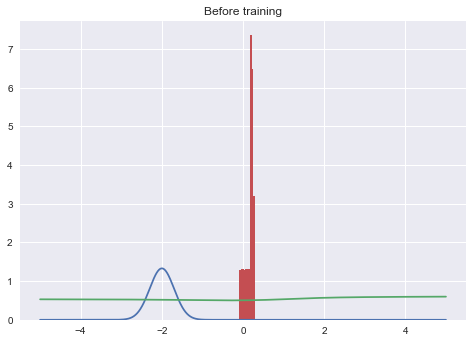

Discriminator loss 0.123599559069
Generator loss 1.0567201376
Discriminator loss 0.544051706791
Generator loss 0.71568864584
Discriminator loss 0.626973330975
Generator loss 1.16463494301
Discriminator loss 0.569396138191
Generator loss 0.568603515625
Discriminator loss 0.668692231178
Generator loss 0.378027021885
Discriminator loss 0.682213246822
Generator loss 0.36747777462
Discriminator loss 0.68426990509
Generator loss 0.384319365025
Discriminator loss 0.68715941906
Generator loss 0.334634065628
Discriminator loss 0.686403989792
Generator loss 0.377866208553
Discriminator loss 0.684871733189
Generator loss 0.365362942219
Discriminator loss 0.675954580307
Generator loss 0.359561473131
Discriminator loss 0.677299797535
Generator loss 0.337418079376
Discriminator loss 0.676415741444
Generator loss 0.355817973614
Discriminator loss 0.679376721382
Generator loss 0.356225937605
Discriminator loss 0.669880390167
Generator loss 0.341197282076
Discriminator loss 0.679715752602
Generator los

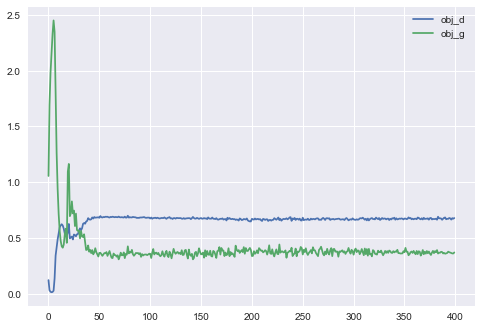

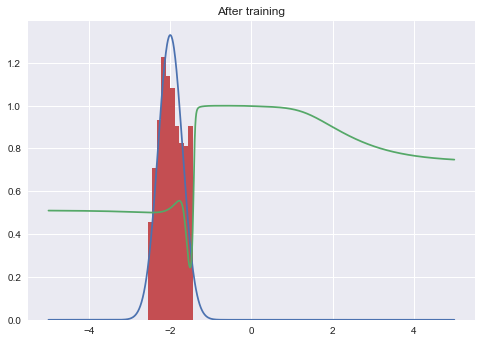

In [18]:
# Drawn from https://gist.github.com/rocknrollnerd/06bfed6b9d1bce612fd6 (in theano)
# This is implemented in PyTorch
# Author : Anirudh Vemula
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from scipy.stats import norm
import matplotlib.pyplot as plt


def sample_noise(M):
    z = np.float32(np.linspace(-5.0, 5.0, M) + np.random.random(M) * 0.01)
    return z


def plot_decision_boundary(discriminate):
    xs = np.linspace(-5, 5, 1000)
    plt.plot(xs, norm.pdf(xs, loc=mu, scale=sigma), label='p_data')

    r = 1000
    xs = np.float32(np.linspace(-5, 5, r))
    xs_tensor = Variable(torch.from_numpy(xs.reshape(r, 1)))
    ds_tensor = discriminate(xs_tensor)
    ds = ds_tensor.data.numpy()
    plt.plot(xs, ds, label='decision boundary')
    plt.show()


def plot_fig(generate, discriminate):
    xs = np.linspace(-5, 5, 1000)
    plt.plot(xs, norm.pdf(xs, loc=mu, scale=sigma), label='p_data')

    r = 5000
    xs = np.float32(np.linspace(-5, 5, r))
    xs_tensor = Variable(torch.from_numpy(xs.reshape(r, 1)))
    ds_tensor = discriminate(xs_tensor)
    ds = ds_tensor.data.numpy()
    plt.plot(xs, ds, label='decision boundary')

    zs = sample_noise(r)
    zs_tensor = Variable(torch.from_numpy(np.float32(zs.reshape(r, 1))))
    gs_tensor = generate(zs_tensor)
    gs = gs_tensor.data.numpy()
    plt.hist(gs, bins=10, normed=True)


# Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.l1 = nn.Linear(1, 10)
        self.l1_relu = nn.ReLU()
        self.l2 = nn.Linear(10, 10)
        self.l2_relu = nn.ReLU()
        self.l3 = nn.Linear(10, 1)

    def forward(self, input):
        output = self.l1(input)
        output = self.l1_relu(output)
        output = self.l2(output)
        output = self.l2_relu(output)
        output = self.l3(output)
        return output


# Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.l1 = nn.Linear(1, 10)
        self.l1_tanh = nn.Tanh()
        self.l2 = nn.Linear(10, 10)
        self.l2_tanh = nn.Tanh()
        self.l3 = nn.Linear(10, 1)
        self.l3_sigmoid = nn.Sigmoid()

    def forward(self, input):
        output = self.l1_tanh(self.l1(input))
        output = self.l2_tanh(self.l2(output))
        output = self.l3_sigmoid(self.l3(output))
        return output


def generator_criterion(d_output_g):
    return -0.5 * torch.mean(torch.log(d_output_g))


def discriminator_criterion(d_output_true, d_output_g):
    return -0.5 * torch.mean(torch.log(d_output_true) + torch.log(1 - d_output_g))


mu = -2
sigma = 0.3
M = 200

discriminate = Discriminator()
generate = Generator()

plot_fig(generate, discriminate)
plt.title('Before training')
plt.show()

epochs = 400
histd, histg = np.zeros(epochs), np.zeros(epochs)
k = 20

visualize_training = False

plt.ion()

discriminate_optimizer = torch.optim.SGD(discriminate.parameters(), lr=0.1, momentum=0.6)
generate_optimizer = torch.optim.SGD(generate.parameters(), lr=0.01, momentum=0.6)

for i in range(epochs):
    for j in range(k):
        discriminate.zero_grad()
        x = np.float32(np.random.normal(mu, sigma, M))
        z = sample_noise(M)
        z_tensor = Variable(torch.from_numpy(np.float32(z.reshape(M, 1))))
        x_tensor = Variable(torch.from_numpy(np.float32(x.reshape(M, 1))))
        g_out = generate(z_tensor)
        d_out_true = discriminate(x_tensor)
        d_out_g = discriminate(g_out)
        loss = discriminator_criterion(d_out_true, d_out_g)
        loss.backward()
        discriminate_optimizer.step()
        histd[i] = loss.data.numpy()

    generate.zero_grad()
    z = sample_noise(M)
    z_tensor = Variable(torch.from_numpy(np.float32(z.reshape(M, 1))))
    g_out = generate(z_tensor)
    d_out_g = discriminate(g_out)
    loss = generator_criterion(d_out_g)
    loss.backward()
    generate_optimizer.step()
    histg[i] = loss.data.numpy()

    if i % 10 == 0:
        print ('Discriminator loss', histd[i])
        print ('Generator loss', histg[i])
        print
        for param_group in generate_optimizer.param_groups:
            param_group['lr'] *= 0.999
        for param_group in discriminate_optimizer.param_groups:
            param_group['lr'] *= 0.999

    if visualize_training:
        plt.clf()
        plot_fig(generate, discriminate)
        plt.draw()

plt.ioff()

plt.clf()
plt.plot(range(epochs), histd, label='obj_d')
plt.plot(range(epochs), histg, label='obj_g')
plt.legend()
plt.show()

plot_fig(generate, discriminate)
plt.title('After training')
plt.show()